In [ ]:
import numpy

# Import the NeuralNetwork class from your new file
from neural_network import NeuralNetwork, train_network, test_network, run_experiment, plot_performance

%matplotlib inline

In [2]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# best learning rate is 0.2
learning_rate = 0.2

#  create instance of neural network
n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [3]:
# load the mnits training data CSV file into a list
# training_data_file = open("data/mnist_train_100.csv", "r")
training_data_file = open("data/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

# Skip the header row (the first element in the list)
# Check if the list is not empty before attempting to skip
if len(training_data_list) > 0:
    training_data_list = training_data_list[1:]

In [ ]:


# epochs is the numbr of times the training data set is used for training
epochs = 2

for e in range(epochs):
    # go through all records in the training dataset
    train_network(n,training_data_list, output_nodes)

    



In [5]:
# load the mnist test data CSV file into a list
# test_data_file = open("data/mnist_test_10.csv", "r")
test_data_file = open("data/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

# Skip the header row (the first element in the list)
# Check if the list is not empty before attempting to skip
if len(test_data_list) > 0:
    test_data_list = test_data_list[1:]

In [6]:
# get the first test record
all_test_values = test_data_list[0].split(",")
# print the label
print(all_test_values[0])


7


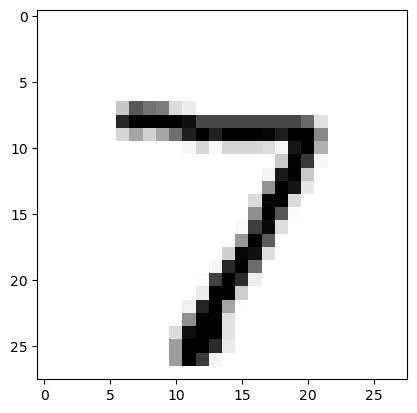

In [7]:
test_image_array = numpy.asarray(all_test_values[1:]).reshape((28, 28))
test_image_array = test_image_array.astype(numpy.float32)
matplotlib.pyplot.imshow(test_image_array, cmap="Greys", interpolation="None")
matplotlib.pyplot.show()

In [8]:

all_test_values_1 = numpy.asarray(all_test_values[1:]).astype(numpy.float32)


scaled_test_input = (all_test_values_1 / 255.0 * 0.99) + 0.01

# predict
n.query(scaled_test_input)


array([[0.00888749],
       [0.00327455],
       [0.00544299],
       [0.00211354],
       [0.00758845],
       [0.01000085],
       [0.00297633],
       [0.99718798],
       [0.00170452],
       [0.00980562]])

In [9]:
# test neural network



# scorecard for how well the network performs, initially empty 
scorecard = []

test_network(n, test_data_list, scorecard)


In [10]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [14]:
# Parameter setup

# Default values for parameters not being varied in a specific experiment
default_learning_rate = 0.2
default_epochs = 1 # Reduced for quicker iterations, feel free to increase
default_hidden_nodes = 100 

In [ ]:
# Compare Learning rate
print("\n--- Learning Rate ---")
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 3.0, 4.0]
lr_performances = []

for lr in learning_rates:
    acc = run_experiment(default_hidden_nodes, lr, default_epochs, training_data_list, test_data_list)
    lr_performances.append(acc)




--- Learning Rate ---
---Running Experiemnt ---
Config: LR=0.01, Epochs=1, HiddenNodes=100
Epoch 1 of 1...
Performance: 0.9210 (took 19.10 seconds)
---Running Experiemnt ---
Config: LR=0.05, Epochs=1, HiddenNodes=100
Epoch 1 of 1...
Performance: 0.9448 (took 19.01 seconds)
---Running Experiemnt ---
Config: LR=0.10, Epochs=1, HiddenNodes=100
Epoch 1 of 1...
Performance: 0.9491 (took 19.14 seconds)
---Running Experiemnt ---
Config: LR=0.20, Epochs=1, HiddenNodes=100
Epoch 1 of 1...
Performance: 0.9521 (took 19.09 seconds)
---Running Experiemnt ---
Config: LR=0.30, Epochs=1, HiddenNodes=100
Epoch 1 of 1...
Performance: 0.9448 (took 19.15 seconds)
---Running Experiemnt ---
Config: LR=0.40, Epochs=1, HiddenNodes=100
Epoch 1 of 1...
Performance: 0.9357 (took 19.77 seconds)
---Running Experiemnt ---
Config: LR=0.50, Epochs=1, HiddenNodes=100
Epoch 1 of 1...


KeyboardInterrupt: 

In [ ]:
plot_performance(learning_rates, lr_performances, "Learning Rate" )

In [ ]:
def getBestParam( param_list, performance_list):
    return param_list[performance_list.index(max(performance_list))]

def printBestParm(param, param_list, performance_list):
    print(f"\nBest {param} Size found: {getBestParam(param_list, performance_list)} with accuracy: {max(performance_list):.4f}")

In [ ]:

# Get the learning rate that corresponds to that maximum performance
best_learning_rate = learning_rates[lr_performances.index(max(lr_performances))]



In [ ]:
# compare epoch size results
epoch_sizes = list(range(1, 11))
epcoh_performances = []

for epoch in epoch_sizes:
    acc = run_experiment(default_hidden_nodes, best_learning_rate, epoch, training_data_list, test_data_list)
    epcoh_performances.append(acc)

plot_performance(epoch_sizes, epcoh_performances, "Epochs" )

In [ ]:
best_epoch_size = getBestParam(epoch_sizes, epcoh_performances)
printBestParm("epoch", epoch_sizes, epcoh_performances)


In [ ]:
hidden_layer_sizes = []
val = 3
while val <= 300:
    hidden_layer_sizes.append(val)
    val *= 3

if 100 not in hidden_layer_sizes:
    hidden_layer_sizes.append(100)
hidden_layer_sizes.sort()

hidden_layer_performances = []

for hs in hidden_layer_sizes:
    acc = run_experiment(hs, best_learning_rate, best_epoch_size,training_data_list, test_data_list)
    hidden_layer_performances.append(acc)

In [ ]:

plot_performance(hidden_layer_sizes, hidden_layer_performances, "Hidden Layer" )

In [ ]:
best_hidden_layer_size = getBestParam(hidden_layer_sizes, hidden_layer_performances)
printBestParm("Hidden Layer", hidden_layer_sizes, hidden_layer_performances)